# Linear Regression in TensorFlow Framework

**Author:** Marcin Sikorski<br>
Date: April, 2023

A simple demonstration of linear (and polynomial) regression solution made with <code>TensorFlow</code> library. Each example will have one independent variable.

### Introduction and Formulation

Linear regression is a type of supervised machine learning and is one of the most fundamental algorithms in the data science field. It aims at finding and tracking a trend line of given data.

<img src='https://dezyre.gumlet.io/images/blog/scikit-learn-linear-regression-example/image_271261974911640325874720.png?w=330&dpr=2.6'  width='350'>

As we know, the formula for a straight line is:

$$y = ax + b,$$

where the parameters defining the nature of a line are: $a$ the slope or gradient and $b$ the intercept. Therefore, given the data $X$, we wish to find its trend with the result $y$. This provides us to the predicted regression line estimated by the model:

$$y(x_i) = a_1 x + a_2,$$

where $a_1$ and $a_2$ are the parameters to be learned by the regression model. The same equation can be denoted in terms of matrices as:

$$f w(x) = w x,$$

where the data matrix $w \in \mathbb{R}^{d_2 \times d_1}$ holds the model's parameters we need to find.

To sum up, we need to find a $w$ that minimizes the residuals $\Delta$:

$\hat{w} = argmi_w ||\Delta||$,
defined by $\Delta_i = y_i - \hat{y}(x_i, w).$

### Generating Training Data

For this experiment we will create data to approximate a nonlinear function given by the following equation:

$$y = x \cos(x).$$

We will generate two datasets: observations dataset and ground truth data. The observations will imitate real life data and contain some noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# random state instances for modules
np.random.seed(seed=42)
tf.random.set_random_seed(seed=42)

In [2]:
# define equation: y = x cos(x)
def generate_samples(x):
    return x * np.cos(x)

num_samples = 100
noise_ratio = 0.4

# generate training points
observation_data = np.random.uniform(low=-np.pi, high=np.pi, size=(num_samples, 1))
values_for_observation = generate_samples(observation_data) + noise_ratio * np.random.normal(size=observation_data.shape)

# generate ground truth data
xs = np.linspace(-np.pi, np.pi, num=num_samples)[:, np.newaxis]
ys = generate_samples(xs)

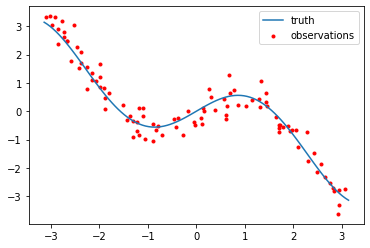

In [3]:
# visualize data for experiment
plt.plot(xs, ys, label='truth')
plt.scatter(observation_data, values_for_observation, marker='.', color='red', label='observations')
plt.legend()
plt.show()

### I. Linear Regression

### Finding Parameters $w$ and $b$

The model will be a basic linear regression defined as: $\hat{y}(x, w, b) = wx + b$, where $w$ is weight, $x$ our input data, and $b$ bias.

In [4]:
# set input and output data
data_input = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='data_input')
target_output = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='target_input')

with tf.variable_scope(name_or_scope='linear_model', reuse=tf.AUTO_REUSE):
    w = tf.get_variable(name='w', shape=(1, 1), dtype=tf.float32, initializer=tf.initializers.random_normal())
    b = tf.get_variable(name='b', shape=(1, 1), dtype=tf.float32, initializer=tf.initializers.zeros())
    model_output = w * data_input + b
        
print(model_output)
print(data_input)

Tensor("linear_model/add:0", shape=(?, 1), dtype=float32)
Tensor("data_input:0", shape=(?, 1), dtype=float32)


### Loss Function

To measure the goodness (quality) of an estimator, we must use a cost function. We will define MSE (mean squared error) as the minimizing metric, meaning that smaller relative scores indicate more or better learning. The MSE is signed as following:

$$E = \frac{1}{2N}||\overline{y} - y||^2 _2,$$

where $||\overline{y} - y||^2 _2$ is the L2 norm (or norm 2). In linear algebra, the L2 norm calculates the distance of the vector coordinate from the origin of the vector space. Other norm 2 notation is:

$$||x||_2 = \sqrt{\sum_{i=1}^n|x_i|^2}.$$

In [5]:
# define MSE for cost function
with tf.name_scope(name='linear_cost_function'):
    cost_function = tf.losses.mean_squared_error(model_output, target_output)

### Model Optimizer

For better $w$ and $b$ fitting we have to find cost function minimum. The most widely used algorithm is the gradient descent optimization.

In [6]:
learning_rate = 0.001

# define gradient descent for optimizer
with tf.name_scope(name='linear_optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    optimization_step = optimizer.minimize(cost_function)

### Training the Linear Model

The model is ready for further learning. We will initialize a list to collect loss values for each epoch.

In [7]:
epochs = 10_000
init = tf.global_variables_initializer()
errors = []

# run linear regression model
with tf.Session() as sess:
    sess.run(init)

    print('===== Training Results =====\n')
    for i in range(epochs):
        loss, _ = sess.run([cost_function, optimization_step],
                           feed_dict={data_input: observation_data, target_output: values_for_observation})
        errors.append(loss)
        
        # display loss for each iteration
        if i % 1_000 == 0:
            print('Iteration: {}, \tloss: {:.6}'.format(i, loss))
            
        predictions = sess.run(model_output, feed_dict={data_input: xs})

===== Training Results =====

Iteration: 0, 	loss: 1.27656
Iteration: 1000, 	loss: 0.847222
Iteration: 2000, 	loss: 0.847221
Iteration: 3000, 	loss: 0.847221
Iteration: 4000, 	loss: 0.847221
Iteration: 5000, 	loss: 0.847221
Iteration: 6000, 	loss: 0.847221
Iteration: 7000, 	loss: 0.847221
Iteration: 8000, 	loss: 0.847221
Iteration: 9000, 	loss: 0.847221


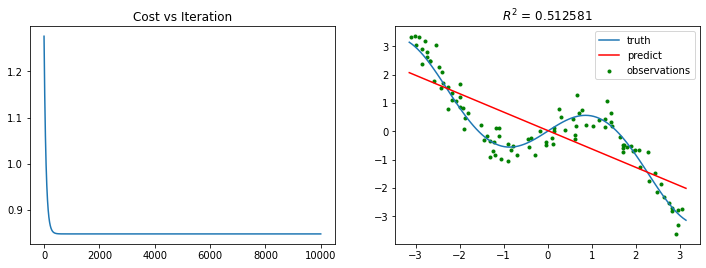

In [8]:
# plot training results
def plot_results():
    from sklearn.metrics import r2_score as r2
    
    fig = plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(list(range(epochs)), errors)
    plt.title('Cost vs Iteration')
    
    plt.subplot(1, 2, 2)
    plt.plot(xs, ys, label='truth')
    plt.plot(xs, predictions, color='r', label='predict')
    plt.scatter(observation_data, values_for_observation, marker='.', color='g', label='observations')
    plt.title('$R^2$ = {:.6}'.format(r2(predictions, ys)))
    plt.legend()
    plt.show()
    
plot_results()

The linear model does not perform really good. The approximation is poor and very generalized. The shape of the curve is completely miscaptured. For a better solution, we need to apply a more sophisticated model for a polynomial function.

### II. Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an n-th degree polynomial in $x$. This regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$.
The formula for a nonlinear line is:

$$y = a_1x + a_2x^2 + ... + a_nx^n + b$$

or:

$$\hat{y}(x, w, b) = w_1x + w_2x^2 + ... + w_nx^n.$$

### Design Matrix and Transforming Data

A design matrix (model matrix or regressor matrix) is a matrix of values of explanatory variables of a set of objects. Depending on the definition the matrix takes different forms. It's size has dimension $n$-by-$p$, where $n$ is the number of samples observed, and $p$ is the number of variables (features) measured in all samples. Some examples of model matrices (with 4-th degree) are as following:

$$\Phi(x) = \begin{bmatrix}x&x^2&x^3&x^4\end{bmatrix}^T,$$

$$\Phi(x) = \begin{bmatrix}1&e^x&e^{2x}&e^{3x}\end{bmatrix}^T,$$

where $x$ is the vector of observations. For a vector with observations:

$$x = \begin{bmatrix}1\cr2\cr4\cr\end{bmatrix},$$

the matrices will be equal:

$$\Phi(x) = \begin{bmatrix}1&1&1&1\cr2&4&8&16\cr4&16&64&256\end{bmatrix},$$

$$\Phi(x) = \begin{bmatrix}1&e^1&e^2&e^3\cr1&e^2&e^4&e^6\cr1&e^4&e^8&e^{12}\end{bmatrix}.$$

In [9]:
# define design matrix
def design_matrix(x_data, poly_degree):
    matrix = np.array([x_data**i for i in range(1, poly_degree + 1)]).T
    return matrix[0]

In [10]:
# perform an example
x = np.array([1, 2, 4])
x = np.reshape(x, (3, 1))

print('Design matrix:\n', design_matrix(x_data=x, poly_degree=4))

Design matrix:
 [[  1   1   1   1]
 [  2   4   8  16]
 [  4  16  64 256]]


Our new model is non-linear, which means that we must transform our data. A polynomial does not have single dimension data and we will need to expand it with the design matrix.

In [11]:
# transform data: dimensional adjustment
poly_degree = 4
observation_data_design_matrix = design_matrix(observation_data, poly_degree)
xs_design_matrix = design_matrix(xs, poly_degree)

### Finding Parameters $w$ and $b$

We will use the same hypothesis as implemented in linear regression with additionally modified input data.

In [12]:
# set input and output data
data_input = tf.placeholder(dtype=tf.float32, shape=(None, poly_degree), name='data_input')
target_output = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='target_input')

with tf.variable_scope(name_or_scope='polynomial_model', reuse=tf.AUTO_REUSE):   
    w = tf.get_variable(name='w', shape=(poly_degree, 1), dtype=tf.float32, initializer=tf.initializers.random_normal())
    b = tf.get_variable(name='b', shape=(1, 1), dtype=tf.float32, initializer=tf.initializers.random_normal())
    
    model_output = tf.linalg.matmul(data_input, w) + b
    
print(model_output)
print(data_input)

Tensor("polynomial_model/add:0", shape=(?, 1), dtype=float32)
Tensor("data_input_1:0", shape=(?, 4), dtype=float32)


### Loss Function

Again, we will apply the MSE (mean squared error) as the cost function.

In [13]:
with tf.name_scope(name='polynomial_cost_function'):
    cost_function = tf.losses.mean_squared_error(model_output, target_output)

### Model Optimizer

We will apply as previously used the partial derivatives (gradients) of the loss function. This time with different learning rate.

In [14]:
learning_rate = 0.0001

with tf.name_scope(name='polynomial_optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    optimization_step = optimizer.minimize(cost_function)

### Training the Polynomial Model

===== Training Results =====

Iteration: 0, 	loss: 358.366
Iteration: 5000, 	loss: 1.04943
Iteration: 10000, 	loss: 0.520779
Iteration: 15000, 	loss: 0.32852
Iteration: 20000, 	loss: 0.251174
Iteration: 25000, 	loss: 0.217869
Iteration: 30000, 	loss: 0.20227
Iteration: 35000, 	loss: 0.194255
Iteration: 40000, 	loss: 0.189772
Iteration: 45000, 	loss: 0.18709


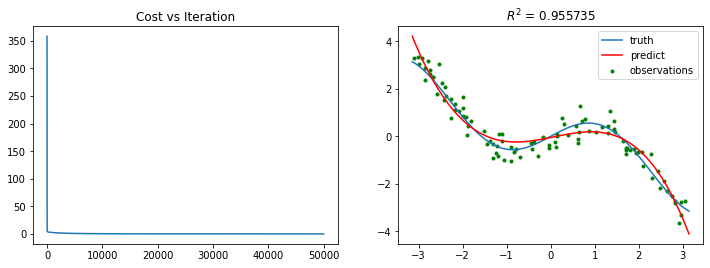

In [15]:
epochs = 50_000
init = tf.global_variables_initializer()
errors = []

# run polynomial regression model
with tf.Session() as sess:
    sess.run(init)
    
    print('===== Training Results =====\n')
    for i in range(epochs):
        loss, _ = sess.run([cost_function, optimization_step],
                            feed_dict={data_input: observation_data_design_matrix, target_output: values_for_observation})
        errors.append(loss)
        
        # display loss for each iteration
        if i % 5_000 == 0:
            print('Iteration: {}, \tloss: {:.6}'.format(i, loss))
            
        predictions = sess.run(model_output, feed_dict={data_input: xs_design_matrix})
        
# plot training results
plot_results()

As we can see, the model can predict the curvature of the dataset relatively well. Polynomial regression is vulnerable to overfitting. We can improve the model performance with regularization.

### Regularization

To overcome overfitting we will add a regularization term to our loss function. We want to avoid the model to fit extremely well to the training data. We will implement L2 regularization. This penalty term is noted as following:

$$\lambda {\sum_{i=1}^nw_i^2}.$$

The regularization adds weight to each variable so the model will not learn too complex. It takes a $\lambda$ hyperparameter which we must define on our own.

===== Training Results =====

Iteration: 0, 	loss: 358.355
Iteration: 5000, 	loss: 1.04699
Iteration: 10000, 	loss: 0.520334
Iteration: 15000, 	loss: 0.328898
Iteration: 20000, 	loss: 0.251927
Iteration: 25000, 	loss: 0.21881
Iteration: 30000, 	loss: 0.203313
Iteration: 35000, 	loss: 0.195359
Iteration: 40000, 	loss: 0.190913
Iteration: 45000, 	loss: 0.188255


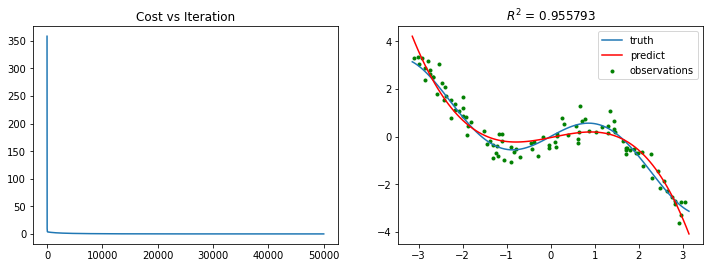

In [16]:
# regularization term
lambda_parameter = 0.004
ridge_regularization = lambda_parameter * tf.math.reduce_sum(w)

# cost function with regularization term
with tf.name_scope(name='polynomial_cost_function'):
    cost_function = tf.losses.mean_squared_error(model_output, target_output) + ridge_regularization

# gradient descent optimizer
with tf.name_scope(name='polynomial_optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
    optimization_step = optimizer.minimize(cost_function)
    
init = tf.global_variables_initializer()
errors = []

# run regression model
with tf.Session() as sess:
    sess.run(init)
    
    print('===== Training Results =====\n')
    for i in range(epochs):
        loss, _ = sess.run([cost_function, optimization_step],
                            feed_dict={data_input: observation_data_design_matrix, target_output: values_for_observation})
        errors.append(loss)
        
        # display loss for each iteration
        if i % 5_000 == 0:
            print('Iteration: {}, \tloss: {:.6}'.format(i, loss))
            
        predictions = sess.run(model_output, feed_dict={data_input: xs_design_matrix})
        
# plot training results
plot_results()

The new model works slightly better. The $R^2$ correlation coefficient was 0.955735. This change is not quite significant, especially with a tiny dataset like ours. However, in larger datasets that have a problem with overfitting, penalty is a crucial step in polynomial regression.